## Exploratory Data Analysis
While some information was provided on the set of instructions for this project, there have been countless times I've found discrepencies between the documentation for the dataset and the dataset itself. Even if all looks good on a high level, it is always helpful to understand our data to the fullest potential.

I will be checking for the following:
- Missing values
- Data anomalies (i.e. negative numbers where there shouldn't be)
- Outliers
- Correlation between variables
- Categorical data distributions

In [46]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
from utils import *

In [4]:
df_train = load_data('../data/au_train.csv')
df_test = load_data('../data/au_test.csv')

In [6]:
print("Shape of the training set: {}. Shape of the test set: {}.".format(df_train.shape, df_test.shape))
print("Columns names:", list(df_train.columns))

Shape of the training set: (32561, 15). Shape of the test set: (16281, 15).
Columns names: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']


In [7]:
# check for null values
print(df_train.isnull().any())

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
class             False
dtype: bool


In [8]:
# print out general statistics for the numerical predictors
df_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
def plot_boxplot(df, num_columns, num_rows, l, save=False):
    '''
    Plots boxplot of numerical features
    
    Input: df (dataframe), num_columns (how many columns you would like in your resulting figure),
           num_rows (how many rows you would like in your resulting figure), l (relevant column names)
    Output: Boxplot distribution for the relevant columns, l
    '''
    plt.figure(figsize=(num_columns*2,5*num_rows))
    for i in range(0,len(l)):
        plt.subplot(num_rows + 1,num_columns,i+1)
        sns.set_style('whitegrid')
        sns.boxplot(y=df[l[i]], color='seagreen')
        plt.tight_layout()
    if save: plt.savefig('boxplot.png', bbox_inches='tight')
    plt.show()

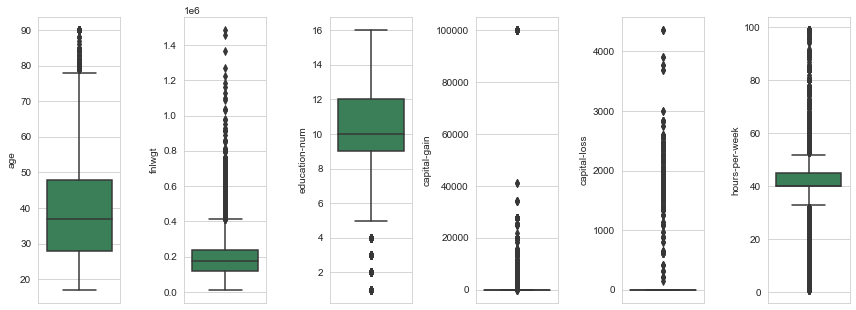

In [14]:
l = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
number_of_columns = len(l)
number_of_rows = int(len(l) - 1 / number_of_columns)

plot_boxplot(df_train, number_of_columns, number_of_rows, l)

In [60]:
def plot_hist(df, save=False):
    '''
    Plots histogram distribution of numerical features
    
    Input: df (dataframe)
    Output: Histogram distribution for the numerical features
    '''
    plt.figure(figsize=(20,10))
    df.hist(layout=(5,4), figsize=(23,20), color='seagreen', edgecolor='black')
    if save: plt.savefig('hist.png', bbox_inches='tight')
    plt.show()

<Figure size 1440x720 with 0 Axes>

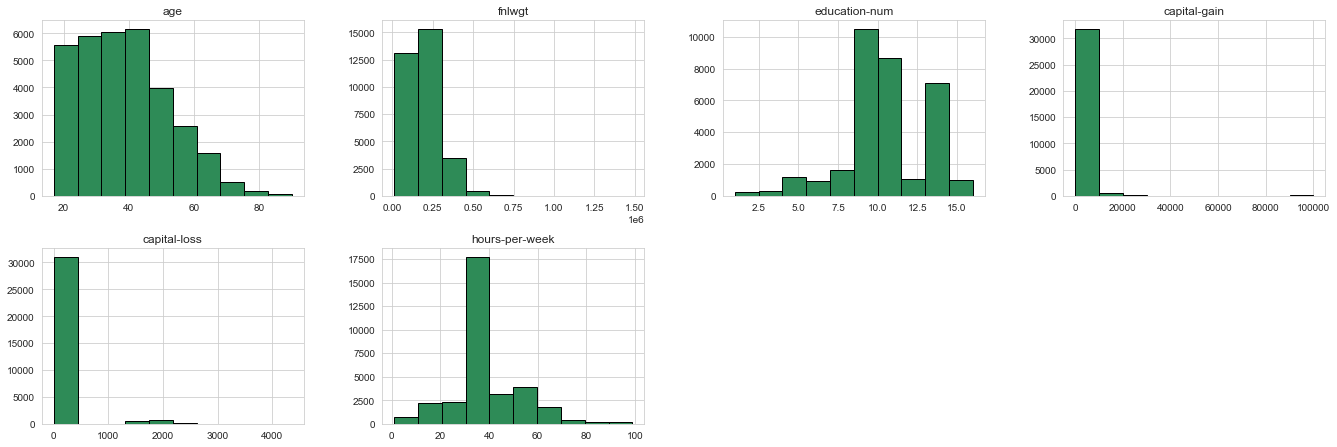

In [61]:
# plotting numerical features in a histogram
plot_hist(df_train)

In [23]:
def plot_kde(df, number_of_columns, number_of_rows, l, save=False):
    '''
    Kernal Density Estimator of the numerical features
    
    Input: df (dataframe), num_columns (how many columns you would like in your resulting figure),
           num_rows (how many rows you would like in your resulting figure), l (relevant column names)
    Output: KDE distribution for the relevant columns, l
    '''
    plt.figure(figsize=(number_of_columns*2,5*number_of_rows))
    for i in range(0,len(l)):
        plt.subplot(number_of_rows + 1,number_of_columns,i+1)
        sns.set_style('whitegrid')
        sns.kdeplot(df[l[i]], color='seagreen', fill=True)
        plt.tight_layout()
    if save: plt.savefig('kde.png', bbox_inches='tight')
    plt.show()

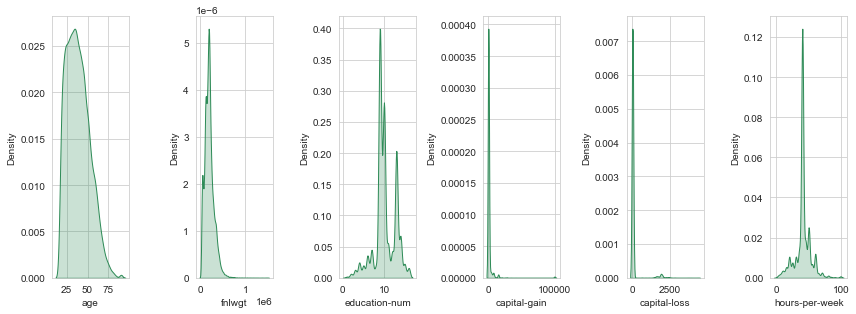

In [24]:
num_columns = len(l)
num_rows = int(len(l) - 1 / num_columns)

plot_kde(df_train, num_columns, num_rows, l)

### Examining correlation between numerical features
Normally it is best practice to drop any information that is highly correlated because highly correlated values can negatively impact the training process

In [25]:
df_train.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [31]:
def plot_correlation(df, save=False):
    plt.figure(figsize=(16,6))
    sns.heatmap(df_train.corr(), cmap="YlGnBu")
    if save: plt.savefig('corr.png', bbox_inches='tight')
    plt.show()

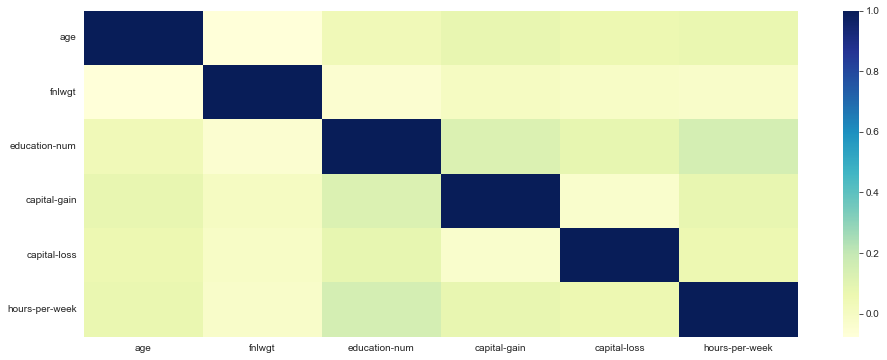

In [32]:
plot_correlation(df_train)

<AxesSubplot:ylabel='education-num'>

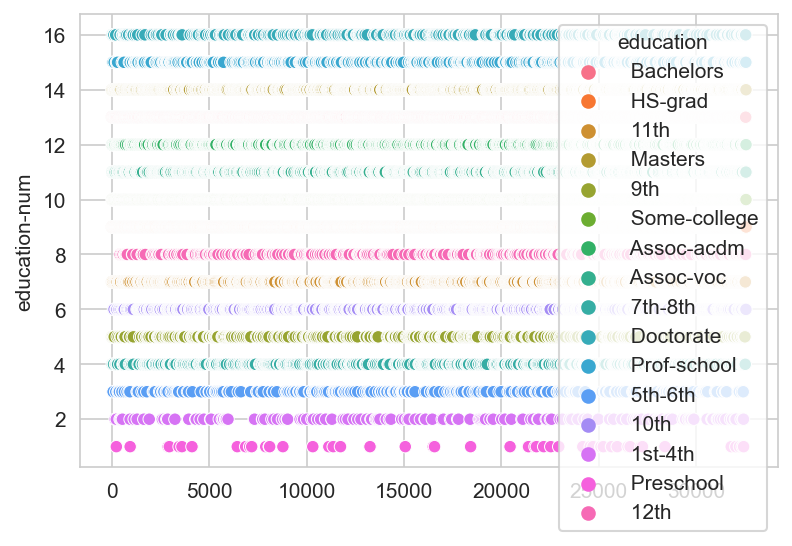

In [71]:
# examining relationship between education (categorical) and education-num (numerical)
plt.figure(dpi=150)
sns.scatterplot(data=df_train, x=df_train.index, y='education-num', hue='education')

In [34]:
def plot_categorical_dist(df, preds):
    '''
    Plots distribution of categorical variables
    '''
    fig, axes = plt.subplots(1, len(preds), figsize=(20, len(preds)))
    for i, pred in enumerate(preds):
        df[pred].value_counts().plot(ax=axes[i], kind='bar', grid=True, title=pred, rot=75, color='seagreen', edgecolor='black')

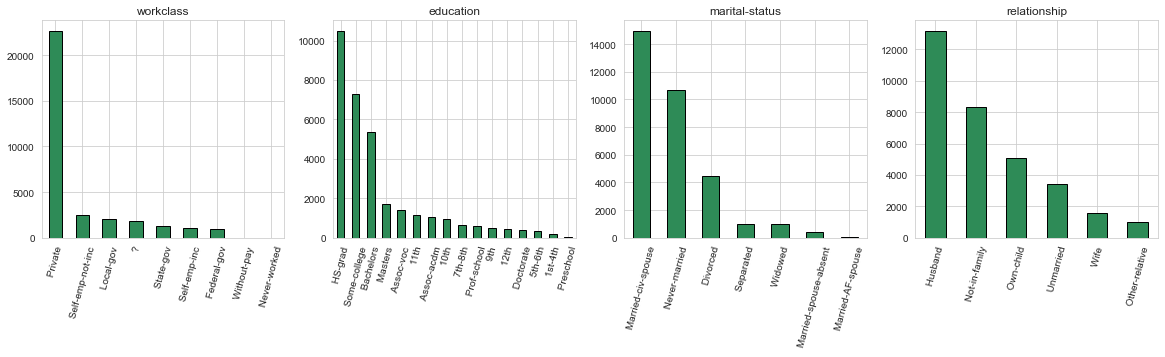

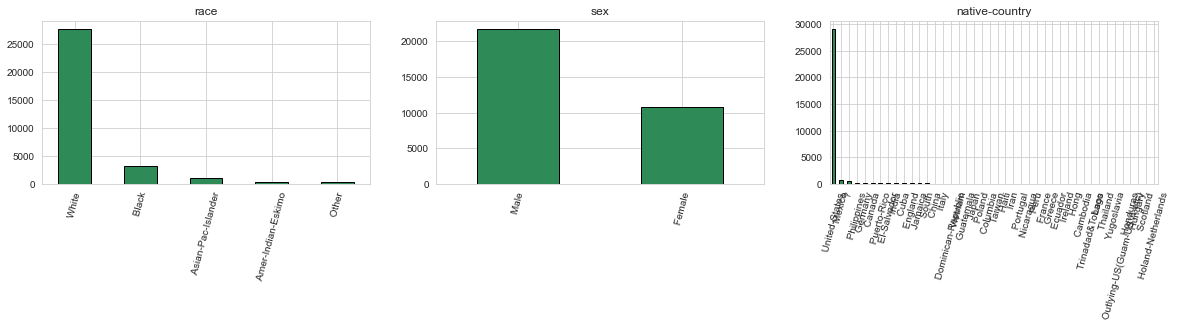

In [35]:
plot_categorical_dist(df_train, ['workclass', 'education', 'marital-status', 'relationship'])
plot_categorical_dist(df_train, ['race', 'sex', 'native-country'])

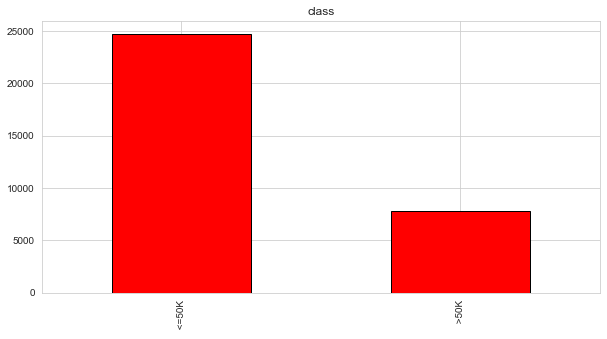

In [40]:
# plotting target variable distribution
plt.figure(figsize=(10,5))
df_train['class'].value_counts().plot(kind='bar', grid=True, title="class", color="red", edgecolor='black')
plt.show()

# Takeaways
- The training dataset is imbalanced, so we can expect our model to more often predict income values <=50k
- The categorical column native-country contains many countries which will increase the complexity of our dataset significantly
- The education is a repeated feature (just a categorical version of education-num)
- There do not appear to be any numerical data that is highly correlated so we will not need to drop any specific features because of correlation
- There appear to be some missing values in workclass feature (labeled as '?')
- There do not appear to be any anomalies in the features (i.e. negative values where there shouldn't be)